In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import random
from gha import GHA

Wczytanie danych MNIST oraz rekonstrukcja do 1000 losowych próbek

In [2]:
mnist = fetch_openml('mnist_784', data_home='./dane/', parser='auto')
X = mnist.data.values / 255.0
y = mnist.target.astype(int).values
idx = np.random.choice(len(X), 1000, replace=False)
X_sample = X[idx]
y_sample = y[idx]

Trenowanie modelu GHA i rekonstrukcja

In [3]:
k = 50
gha = GHA(n_components=k, eta=0.001, n_epochs=100)
gha.fit(X_sample)
X_transformed = gha.transform(X_sample)
X_reconstructed = gha.inverse_transform(X_transformed)

Wizualizacja przykładowych rekonstrukcji

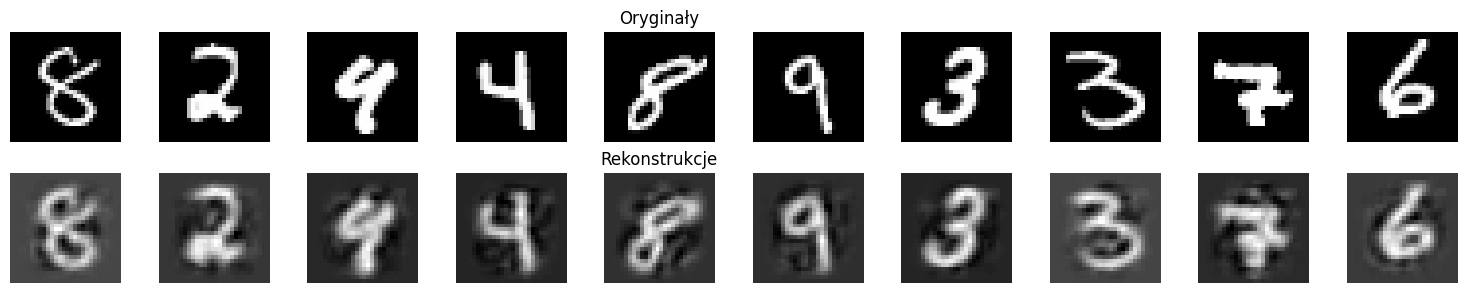

In [4]:
fig, axes = plt.subplots(2, 10, figsize=(15, 3))
for i, ax in enumerate(axes[0]):
    ax.imshow(X_sample[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    if i == 4:
        ax.set_title("Oryginały")

for i, ax in enumerate(axes[1]):
    ax.imshow(X_reconstructed[i].reshape(28, 28), cmap="gray")
    ax.axis("off")
    if i == 4:
        ax.set_title("Rekonstrukcje")

plt.tight_layout()
plt.show()

Wizualizacja wektorów własnych

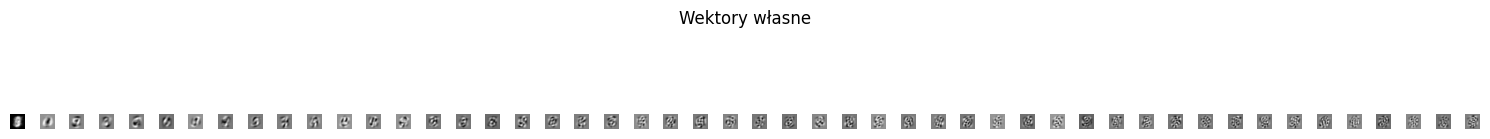

In [5]:
fig, axes = plt.subplots(1, k, figsize=(15, 2))
for i in range(k):
    axes[i].imshow(gha.W[i].reshape(28, 28), cmap="gray")
    axes[i].axis("off")
plt.suptitle("Wektory własne")
plt.tight_layout()
plt.show()

Wykres rozrzutu dla 2 pierwszych składowych

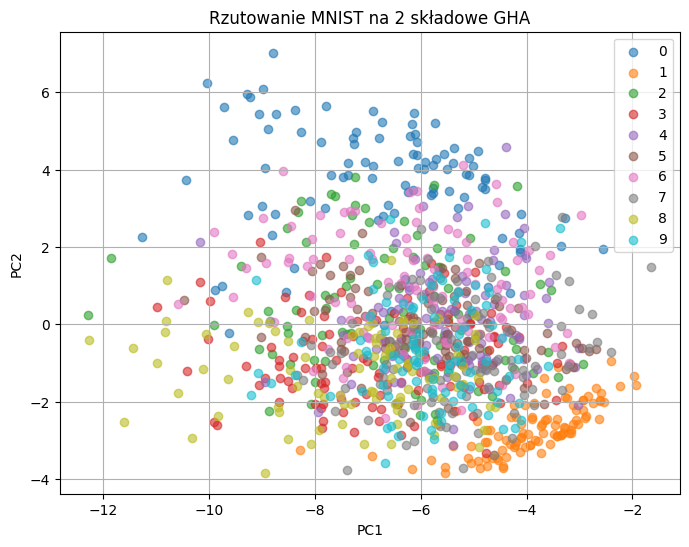

In [6]:
gha2 = GHA(n_components=2, eta=0.001, n_epochs=100)
gha2.fit(X_sample)
X_proj = gha2.transform(X_sample)

plt.figure(figsize=(8, 6))
for digit in range(10):
    plt.scatter(
        X_proj[y_sample == digit, 0],
        X_proj[y_sample == digit, 1],
        label=str(digit), alpha=0.6
    )
plt.legend()
plt.title("Rzutowanie MNIST na 2 składowe GHA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()